In [3]:
import os
os.chdir('../')
from ObjectDetectionMetrics import *
import sys
import glob
import os
from ObjectDetectionMetrics.utils import CoordinatesType, BBType, BBFormat
from ObjectDetectionMetrics.BoundingBox import BoundingBox
from ObjectDetectionMetrics.BoundingBoxes import BoundingBoxes


def getBoundingBoxes(gt_folder, det_folder):
    # Class representing bounding boxes (ground truths and detections)
    allBoundingBoxes = BoundingBoxes()
    # Read groundtruths
    os.chdir(gt_folder)
    files = glob.glob("*.txt")
    files.sort()
    # Read GT detections from txt file
    # Each line of the files in the groundtruths folder represents a ground truth bounding box (bounding boxes that a detector should detect)
    # Each value of each line is  "class_id, x, y, width, height" respectively
    # Class_id represents the class of the bounding box
    # x, y represents the most top-left coordinates of the bounding box
    # x2, y2 represents the most bottom-right coordinates of the bounding box
    for f in files:
        nameOfImage = f.replace(".txt","")
        fh1 = open(f, "r")
        for line in fh1:
            line = line.replace("\n","")
            if line.replace(' ','') == '':
                continue
            splitLine = line.split(" ")
            idClass = splitLine[0] #class
            x = float(splitLine[1])
            y = float(splitLine[2])
            w = float(splitLine[3])
            h = float(splitLine[4])
            bb = BoundingBox(nameOfImage,idClass,x,y,w,h,CoordinatesType.Absolute, (200,200), BBType.GroundTruth, format=BBFormat.XYWH)
            allBoundingBoxes.addBoundingBox(bb)
        fh1.close()
    # Read detections
    os.chdir(det_folder)
    files = glob.glob("*.txt")
    files.sort()
    # Read detections from txt file
    # Each line of the files in the detections folder represents a detected bounding box.
    # Each value of each line is  "class_id, confidence, x, y, width, height" respectively
    # Class_id represents the class of the detected bounding box
    # Confidence represents the confidence (from 0 to 1) that this detection belongs to the class_id.
    # x, y represents the most top-left coordinates of the bounding box
    # x2, y2 represents the most bottom-right coordinates of the bounding box
    for f in files:
        # nameOfImage = f.replace("_det.txt","")
        nameOfImage = f.replace(".txt","")
        # Read detections from txt file
        fh1 = open(f, "r")
        for line in fh1:
            line = line.replace("\n","")
            if line.replace(' ','') == '':
                continue
            splitLine = line.split(" ")
            idClass = splitLine[0] #class
            confidence = float(splitLine[1]) #confidence
            x = float(splitLine[2])
            y = float(splitLine[3])
            w = float(splitLine[4])
            h = float(splitLine[5])
            bb = BoundingBox(nameOfImage, idClass,x,y,w,h,CoordinatesType.Absolute, (200,200), BBType.Detected, confidence, format=BBFormat.XYWH)
            allBoundingBoxes.addBoundingBox(bb)
        fh1.close()
    return allBoundingBoxes

# Read txt files containing bounding boxes (ground truth and detections)
boundingboxes = getBoundingBoxes('/Users/vvv/Code/Code_dev/Evaluation/data/sample_2/groundtruths', '/Users/vvv/Code/Code_dev/Evaluation/data/sample_2/detections')

In [4]:
from ObjectDetectionMetrics.Evaluator import Evaluator

# Create an evaluator object in order to obtain the metrics
evaluator = Evaluator()

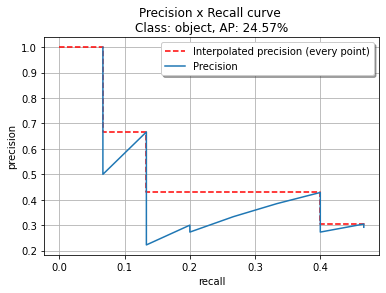

[{'class': 'object',
  'precision': array([1.        , 0.5       , 0.66666667, 0.5       , 0.4       ,
         0.33333333, 0.28571429, 0.25      , 0.22222222, 0.3       ,
         0.27272727, 0.33333333, 0.38461538, 0.42857143, 0.4       ,
         0.375     , 0.35294118, 0.33333333, 0.31578947, 0.3       ,
         0.28571429, 0.27272727, 0.30434783, 0.29166667]),
  'recall': array([0.06666667, 0.06666667, 0.13333333, 0.13333333, 0.13333333,
         0.13333333, 0.13333333, 0.13333333, 0.13333333, 0.2       ,
         0.2       , 0.26666667, 0.33333333, 0.4       , 0.4       ,
         0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
         0.4       , 0.4       , 0.46666667, 0.46666667]),
  'AP': 0.24568668046928915,
  'interpolated precision': [1.0,
   1.0,
   0.6666666666666666,
   0.6666666666666666,
   0.5,
   0.42857142857142855,
   0.42857142857142855,
   0.42857142857142855,
   0.42857142857142855,
   0.42857142857142855,
   0.42857142857142855,
   0.428571428571

In [5]:
from ObjectDetectionMetrics.utils import MethodAveragePrecision

# Plot Precision x Recall curve
evaluator.PlotPrecisionRecallCurve(
    boundingboxes,  # Object containing all bounding boxes (ground truths and detections)
    IOUThreshold=0.3,  # IOU threshold
    method=MethodAveragePrecision.EveryPointInterpolation,  # As the official matlab code
    showAP=True,  # Show Average Precision in the title of the plot
    showInterpolatedPrecision=True)  # Plot the interpolated precision curve

In [6]:
import numpy as np

# Get metrics with PASCAL VOC metrics
metricsPerClass = evaluator.GetPascalVOCMetrics(
    boundingboxes,  # Object containing all bounding boxes (ground truths and detections)
    IOUThreshold=0.3,  # IOU threshold
    method=MethodAveragePrecision.EveryPointInterpolation)  # As the official matlab code
print("Average precision values per class:\n")
# Loop through classes to obtain their metrics
for mc in metricsPerClass:
    # Get metric values per each class
    c = mc['class']
    precision = mc['precision']
    recall = mc['recall']
    average_precision = mc['AP']
    ipre = mc['interpolated precision']
    irec = mc['interpolated recall']
    # Print AP per class
    print('%s: %f' % (c, average_precision))

Average precision values per class:

object: 0.245687
